In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_excel('/content/dataset.xlsx')
data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [4]:
data.isnull().sum()

text     10
label     2
dtype: int64

In [5]:
data=data.dropna(how='any')

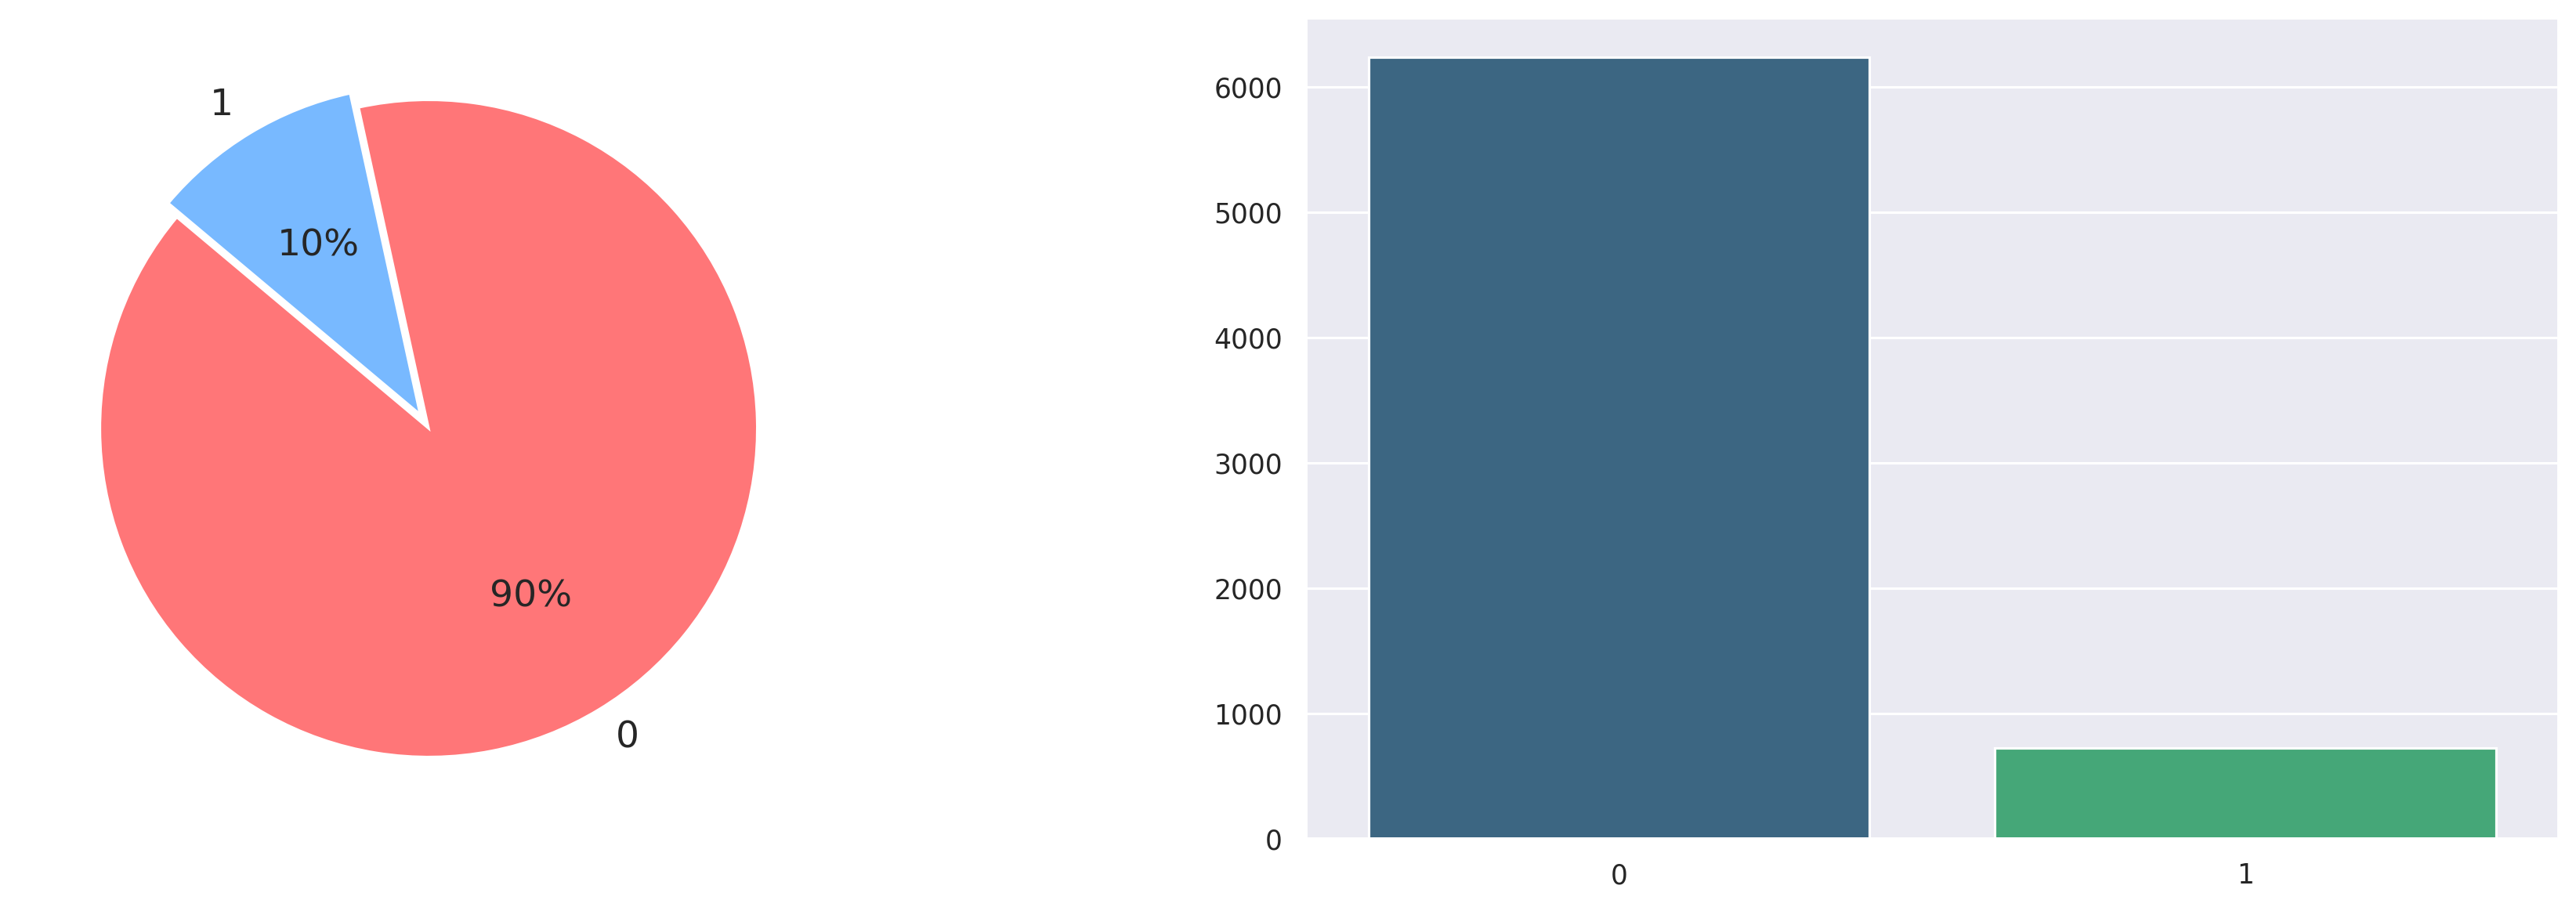

In [6]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7678', '#78b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

In [7]:
data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text"].apply(count_total_words)

In [8]:
data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


In [9]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

In [10]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

In [11]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

In [12]:
data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,trouble sleeping confused mind restless heart ...,1.0,10,55
2,all wrong back off dear forward doubt stay in ...,1.0,14,65
3,ive shifted my focus to something else but im ...,1.0,11,51
4,im restless and restless its been a month now ...,1.0,14,59


In [13]:
def remove_stopwords(text):
    new_list = []
    words= word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

In [14]:
data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

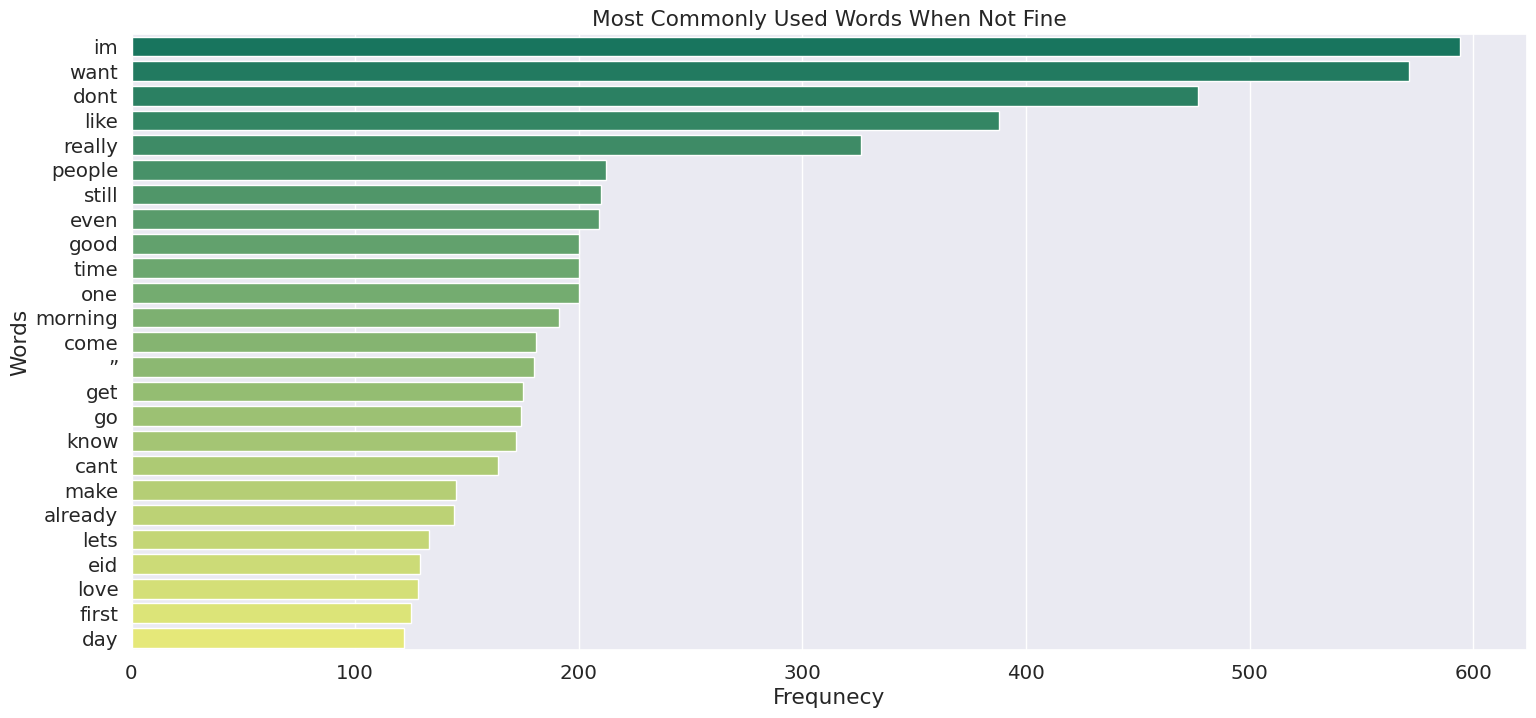

In [22]:
all_nodep_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Fine")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [16]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)
X_train = [text.lower() for text in X_train]
X_test = [text.lower() for text in X_test]

In [17]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [18]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')



In [19]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

Accuracy of the model: 0.989
Precision Score of the model: 0.978
Recall Score of the model: 0.911


In [20]:
y_new=rf.predict(tfidf.transform(["i am feeling restless"]))
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")

positive
